In [1]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
# (m, n) is (# of sampels, # of features)
m, n = housing.data.shape

housing_data_plus_bias = np.c_[np.ones((m,1)), housing.data]
housing_targets = housing.target.reshape(-1,1)

std_scaler = StandardScaler()
scaled_housing_data_plus_bias = std_scaler.fit_transform(housing_data_plus_bias)

In [5]:
X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name='X')
y = tf.constant(housing_targets, dtype=tf.float32, name='y')
XT = tf.transpose(X)

# n+1 is the number of features. (x1, ... xn + x0(bias)).
theta = tf.Variable(tf.random_uniform(shape=[n+1, 1],
                                      minval=-1.0,
                                      maxval=1.0), name='theta')
y_pred = tf.matmul(X, theta, name='predictions')
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name='mse')
gradients = tf.gradients(mse, [theta])[0]
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
optimizer = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.9)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

history = {'training_error':[]}

with tf.Session() as sess:
    sess.run(init)
    
    n_epochs = 1000
    for epoch in range(n_epochs):
        training_error = mse.eval()
        history['training_error'].append(training_error)
        sess.run(training_op)
    
    best_theta = theta.eval()

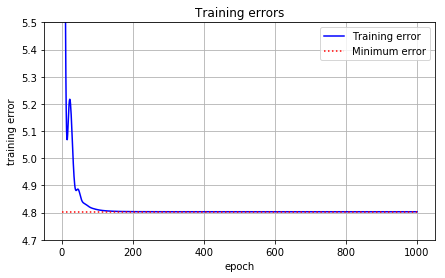

In [6]:
import matplotlib.pyplot as plt

training_errors = history['training_error']
epochs = np.arange(n_epochs) + 1
min_error = min(training_errors)

plt.figure(figsize=(7,4))
plt.title('Training errors')
plt.plot(epochs, training_errors, 'b', label='Training error')
plt.plot([0, n_epochs], [min_error, min_error], 'r:', label='Minimum error')
plt.xlabel('epoch')
plt.ylabel('training error')
plt.ylim([4.7, 5.5])
plt.legend()
plt.grid()
plt.show()